# Data Description
Here we will be loading and exploring the dataset OxfordIIITPet. To get us starting we will be importing the necessray libraries we will be using throughout this notebook.

In [1]:
# Import necessary libraries
import torchvision
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt 
import numpy as np 

print("Import statements executed.")

Import statements executed.


## Transformation
Now we need to do some preprocessing to the images in the dataset. The preprocessing in required as the pre-trained models are expecting a certain format, so that they are able to work with them.

In [2]:
# --- Define Basic Transforms ---
# We need to preprocess the images to the format expected by the pre-trained models.
# 1. Resize: Models like ResNet/MobileNet are typically trained on 224x224 images.
# 2. ToTensor: Converts the image (PIL Image) to a PyTorch Tensor and scales pixel values to [0.0, 1.0].
# IMPORTANT: We will add ImageNet normalization in the next lecture!
print("Defining basic transforms (Resize and ToTensor)...")
basic_transform = transforms.Compose([
    transforms.Resize((224, 224)), # Resize images to 224x224 pixels
    transforms.ToTensor(),         # Convert image to PyTorch Tensor (C, H, W) and scale to [0, 1]
])
print("Transforms defined.")

Defining basic transforms (Resize and ToTensor)...
Transforms defined.


## Loading Dataset
After applying the previous transformation we will now load the data set.(Note this may take a while to download as it is a rather large dataset)

In [4]:
# --- Load the Oxford-IIIT Pet Dataset ---
print("\nLoading the Oxford-IIIT Pet dataset using torchvision...")
print("(Download will happen automatically if data is not found in './data')")

# Define the root directory where the dataset will be stored
data_root = '../data'

# Load the 'trainval' split (combines original training and validation data)
# This provides more data for training our model.
train_val_dataset = torchvision.datasets.OxfordIIITPet(
    root=data_root,
    split='trainval',
    download=True,         # Download if not already present
    transform=basic_transform # Apply the transformations defined above
)

# Load the 'test' split for final evaluation
test_dataset = torchvision.datasets.OxfordIIITPet(
    root=data_root,
    split='test',
    download=True,
    transform=basic_transform
)

print("--- Dataset loading complete! ---")


Loading the Oxford-IIIT Pet dataset using torchvision...
(Download will happen automatically if data is not found in './data')


100%|██████████| 792M/792M [02:02<00:00, 6.49MB/s] 


Extracting ../data/oxford-iiit-pet/images.tar.gz to ../data/oxford-iiit-pet


100%|██████████| 19.2M/19.2M [00:04<00:00, 4.26MB/s]


Extracting ../data/oxford-iiit-pet/annotations.tar.gz to ../data/oxford-iiit-pet
--- Dataset loading complete! ---



## Data Exploration
Here we will be printing some basic dataset information such as the breed with the most images and the breed with the least images and how many images how each breed.

In [5]:
# --- Print some dataset information ---
print(f"\nDataset Statistics:")
print(f"  Number of training/validation images: {len(train_val_dataset)}")
print(f"  Number of test images:              {len(test_dataset)}")
num_classes = len(train_val_dataset.classes)
print(f"  Number of classes (breeds):         {num_classes}")
# You can see the list of breeds via: train_val_dataset.classes

# --- Show an example image and label ---
print("\nExample from the dataset:")
# Get a sample image tensor and its corresponding integer label
img_tensor, label_index = train_val_dataset[100] # Example: Fetch the 101st item

print(f"  Image Tensor shape: {img_tensor.shape}") # Shape: [Channels, Height, Width] - e.g., [3, 224, 224]
print(f"  Label index:        {label_index}")      # Integer label for the class
print(f"  Corresponding breed name: {train_val_dataset.classes[label_index]}") # Look up the name

# Count the number of images for each breed
breed_counts = {breed: 0 for breed in train_val_dataset.classes}
for _, label in train_val_dataset:
    breed_counts[train_val_dataset.classes[label]] += 1

# Find the breed with the most and least images
most_images_breed = max(breed_counts, key=breed_counts.get)
least_images_breed = min(breed_counts, key=breed_counts.get)

# Print the counts and the breeds
print("\nNumber of images per breed:")
for breed, count in breed_counts.items():
    print(f"  {breed}: {count}")

print(f"\nBreed with the most images: {most_images_breed} ({breed_counts[most_images_breed]} images)")
print(f"Breed with the least images: {least_images_breed} ({breed_counts[least_images_breed]} images)")


Dataset Statistics:
  Number of training/validation images: 3680
  Number of test images:              3669
  Number of classes (breeds):         37

Example from the dataset:
  Image Tensor shape: torch.Size([3, 224, 224])
  Label index:        2
  Corresponding breed name: American Pit Bull Terrier

Number of images per breed:
  Abyssinian: 100
  American Bulldog: 100
  American Pit Bull Terrier: 100
  Basset Hound: 100
  Beagle: 100
  Bengal: 100
  Birman: 100
  Bombay: 96
  Boxer: 100
  British Shorthair: 100
  Chihuahua: 100
  Egyptian Mau: 93
  English Cocker Spaniel: 96
  English Setter: 100
  German Shorthaired: 100
  Great Pyrenees: 100
  Havanese: 100
  Japanese Chin: 100
  Keeshond: 100
  Leonberger: 100
  Maine Coon: 100
  Miniature Pinscher: 100
  Newfoundland: 96
  Persian: 100
  Pomeranian: 100
  Pug: 100
  Ragdoll: 100
  Russian Blue: 100
  Saint Bernard: 100
  Samoyed: 100
  Scottish Terrier: 100
  Shiba Inu: 100
  Siamese: 99
  Sphynx: 100
  Staffordshire Bull Terrie

## Visualizing an example image
  Here we will be using matplotlib to display example images for 3-4 different breeds from the dataset.

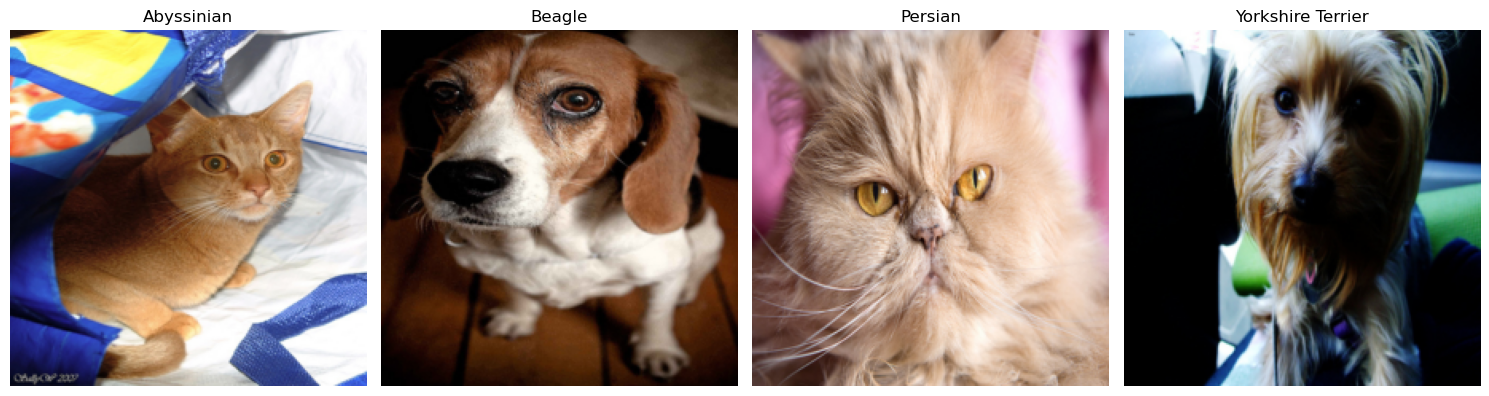

In [6]:
# --- Display example images for 3-4 different breeds ---
breeds_to_display = ['Abyssinian', 'Beagle', 'Persian', 'Yorkshire Terrier']  # Breeds of your choice
fig, axes = plt.subplots(1, len(breeds_to_display), figsize=(15, 5))

for i, breed in enumerate(breeds_to_display):
    # Find the first image of the breed in the dataset
    for img_tensor, label in train_val_dataset:
        if train_val_dataset.classes[label] == breed:
            # Rearrange tensor dimensions for display (C, H, W) -> (H, W, C)
            img_vis = img_tensor.permute(1, 2, 0).numpy()
            axes[i].imshow(img_vis)
            axes[i].set_title(breed)
            axes[i].axis('off')
            break

plt.tight_layout()
plt.show()